In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [ ]:
# Download of files:
df_products = pd.read_csv("../data/products.csv")
df_reviews = pd.read_csv("../data/reviews_en.csv")
df_scores = pd.read_csv("../data/scores.csv")


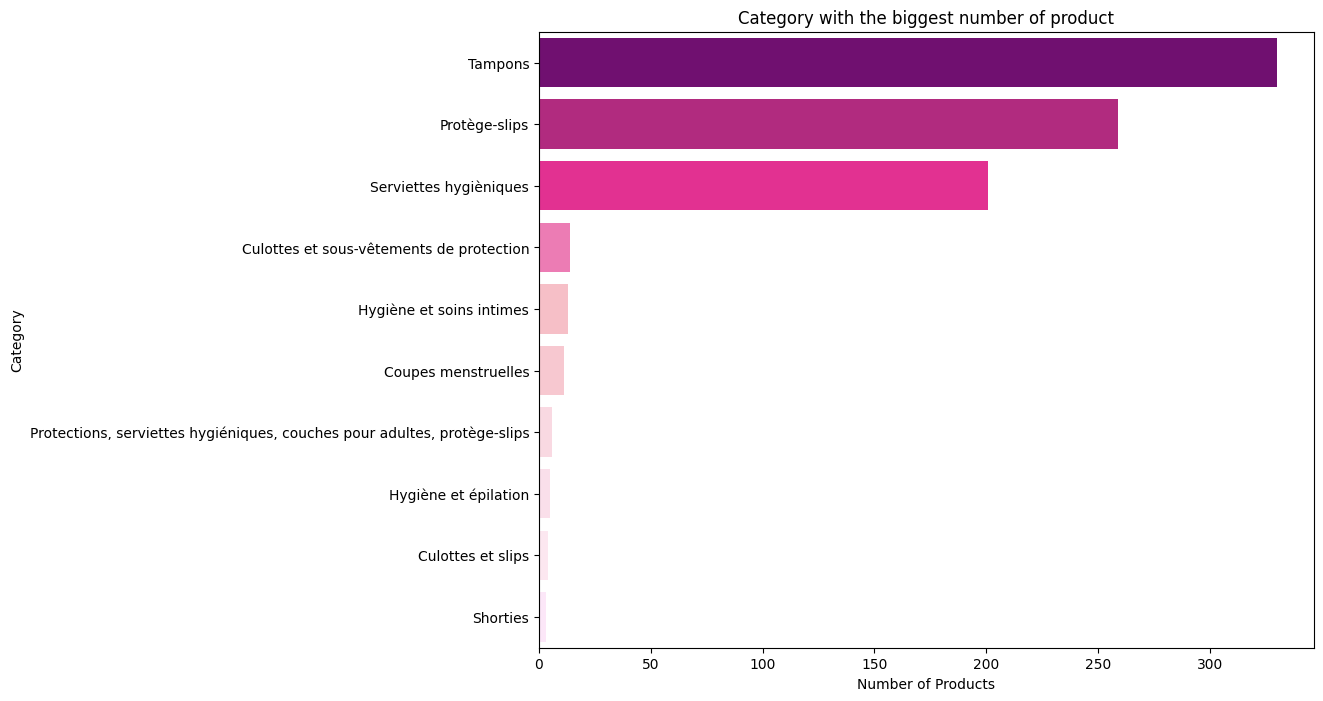

In [ ]:
# Find the top 10 categories
top_10_categories = df_products["category"].value_counts().head(10)

# Define a custom palette with shades of pink ordered from darkest to lightest
custom_palette = sns.color_palette(
    [
        "#800080",
        "#C71585",
        "#FF1493",
        "#FF69B4",
        "#FFB6C1",
        "#FFC0CB",
        "#FFD3E0",
        "#FFDAE9",
        "#FFE4F0",
        "#FFE4FA",
    ]
)

# Plotting the bar chart for the top 10 categories
plt.figure(figsize=(10, 8))
sns.barplot(
    x=top_10_categories.values, y=top_10_categories.index, palette=custom_palette
)
plt.title("Category with the biggest number of product")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.show()


#**1/ Looking to find the category of product the most relevant**

> Indented block


This graph, called "Category with the biggest number of product" lists all the types of products that were scrapped and observes which products have the most variety. When looking at the graph, you can see that the singular product with the most variety is tampons. The second product with the most variety is pads and other singular-use products used on the outside of your body. Finally, the category of products that has the least variety, by a significant margin, includes reusable products like cups, menstrual underwear, and more.


In [ ]:
# Define the specified categories
specified_categories = [
    "Tampons",
    "Protège-slips",
    "Serviettes hygièniques",
    "Culottes et sous-vêtements de protection",
    "Coupes menstruelles",
]

# Filter the DataFrame to keep only the specified categories
df_products_f = df_products[df_products["category"].isin(specified_categories)]

# Display the first few rows of the filtered DataFrame
df_products_f.head()


,Unnamed: 0,asin,avg_rating,brand,category,feature_bullets,num_reviews,price,unities
0,0,B07BFMNKBJ,4.7,Nett,Tampons,['Son ouverture en corolle permet une adaptati...,223.0,2.66,32.0
1,1,B07YQG6J8C,4.6,Nett,Tampons,"[""Les tampons Nett ProComfort sont ultra confo...",303.0,3.79,24.0
2,2,B07DX91LR6,4.7,Always,Tampons,"['La combinaison n°\xa01 de confort, protectio...",859.0,3.10,18.0
3,3,B082VVC4ZB,4.7,Nett,Tampons,['Son ouverture en corolle permet une adaptati...,144.0,2.81,32.0
4,4,B0BQJQW12P,4.7,Always,Tampons,['Tampax offre une protection longue durée ave...,30.0,4.50,18.0


#**2/ Let’s look at the words that stand out the most in the reviews**


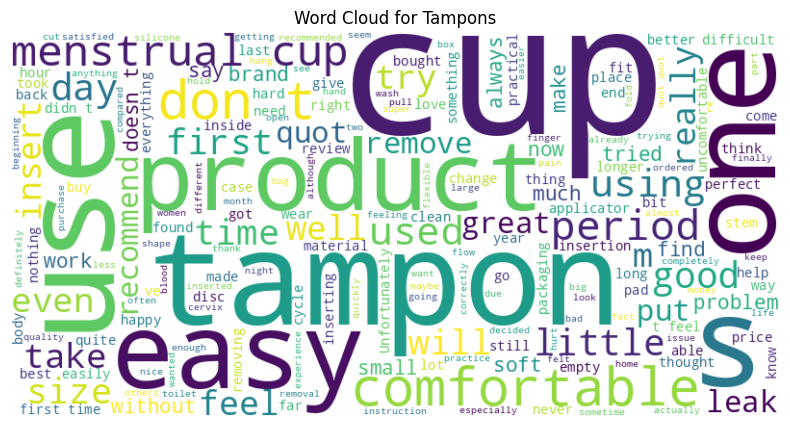

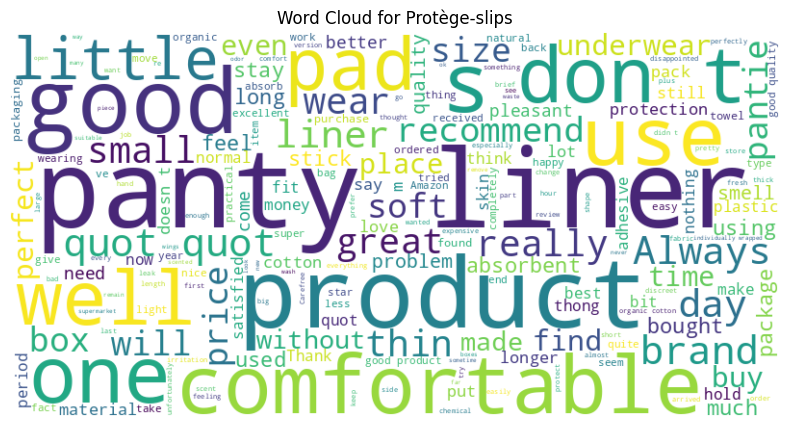

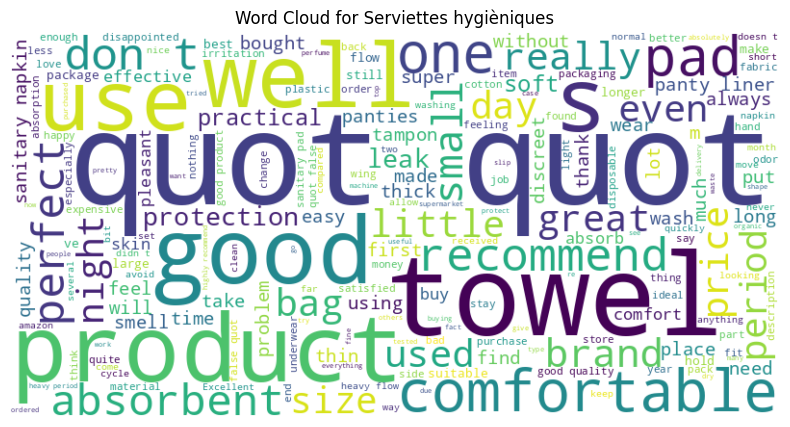

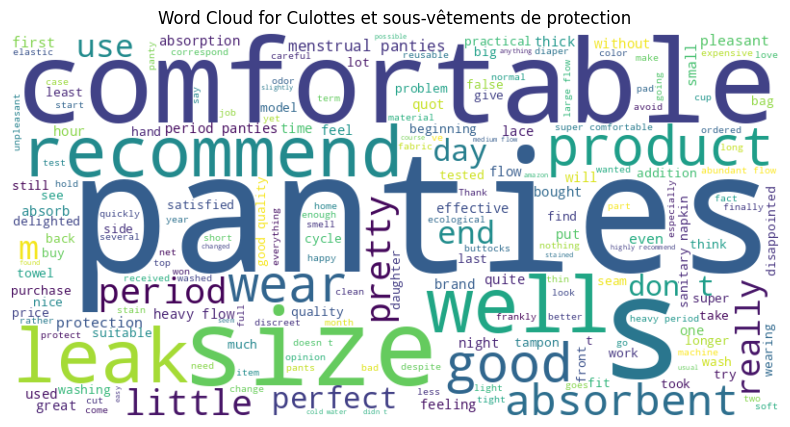

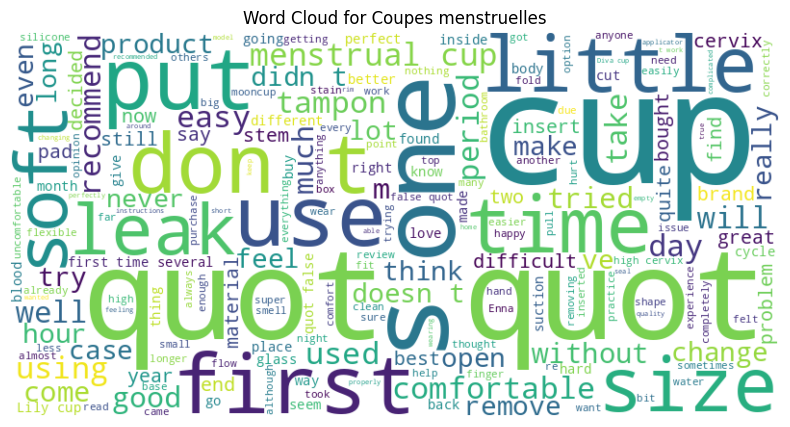

In [ ]:
# Create a separate word cloud for each specified category
for category in specified_categories:
    # First, filter the reviews to include only those that match the products in 'df_products_f' for the current category
    filtered_reviews = df_reviews[
        df_reviews["asin"].isin(
            df_products_f[df_products_f["category"] == category]["asin"]
        )
    ]

    # Combine all review texts into a single string
    review_text = " ".join(review for review in filtered_reviews["body_en"])

    # Generate the word cloud for the current category
    wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
        review_text
    )

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {category}")
    plt.axis("off")
    plt.show()


**1/ Most recuring key words for the "Tampon" category**

> The most relevant key words that appear in the reviews regarding tampons are:

- Leak : This suggests an inefficiency which should be notes
- Use : Relevant when associated with "One"
- Comfortable : positive adjective related to the product
- Easy : easy to use
- Menstrual cup : This could be an insight on some reviews that compare tampons to menstrual cups.

> Althought there are mostly some positive words, it must be noted that the word don't is also there as well as the word leak.

> The association of the words "One" and "Use" could underline a significance to the number of times a tampon can be used in contrast with the menstrual cup.

**2/ Most recuring key words for the "Protège-slip" category**

> The most relevant key words that appear in the reviews regarding brief protections are:

- Comfortable
- Well
- Good
- Little : suggests there is an importance attributed to the size of the product
- Don't : suggets mixed feelings about certain features of some products

> Here we have a repitition of the word "Comfortable" however in this case the word "Don't" appears more prominently

**3/ Most recuring key words for the "Serviette-Hygienique" category**

> The most relevant key words that appear in the reviews regarding pads are:

- Absorbant : The word relates to the efficiency of the product
- Well
- Good
- Comfortable
- Recommend

> In this category there seems to be a slight betterment in the comments as the size of the word "don't" on the other hand decreased

**4/ Most recuring key words for the "Culotte et sous-vêtements de protection" category**

> The most relevant key words that appear in the reviews regarding panties and underware protections are:

- Size
- Comfortable
- Recommend
- Well
- Leak

> The size of the word comfortable and recommend are significantly bigger than for the previous categories.

**5/ Most recuring key words for the "Coupe menstruelle" category**

> The most relevant key words that appear in the reviews regarding menstrual cups are:

- First : The word first is only mentioned as much in cup category. This could underline the fact that cups are bought for the first time by the person that will try it. Tampons and pads are usually the first products used and therefore bought by parents and aren't a real choice.
- One : We can suppose it might be in reference to the number of units delivered/needed
- Little : Cups can be found different sizes and shapes, here there seems to be a recurence of the word that gives importance either to the size, or as there is the word leak, it may refer to its practicallity as well.
- Leak
- Don't

> These word suggest that this category of menstrual protections are newer and less well known.

Overall the points raised in the comments revolve around the comfort, the size and seem mostly positive. One of the most recurring words regardless of the category is "Comfortable", meaning most of the products with comments appear to have been approved by the consumers.


This visualization offers clear information about which keywords are most apparent in the reviews of the products. This doesn't necessarily represent what consumers are purchasing but rather what they are most curious about. In the case of menstrual products, we see that the words that tend to appear the most are: cup, tampon, use, and one. We can interpret that there are two main general ideas in the reviews: first, that there is an interest in and use of cups or other reusable menstrual products of this type, and the second most common word for a review is tampons or single-use products used for menstrual purposes.

It is arbitrary to conclude that these key words in the reviews show us which products are the most/least popular; therefore, we need to conduct a sentiment analysis to see in which regard these terms were being used.


REPEAT THIS ANALYSIS PER CATEGORY
find the key words and classify
EXAMPLE: KEY WORDS FOR TAMPONS, FOR PADS, ETC


In [ ]:
df_scores.columns


Index(['Unnamed: 0', 'asin', 'price_weighted_normalized',
       'leak_weighted_normalized', 'absorb_weighted_normalized',
       'comfort_weighted_normalized', 'material_weighted_normalized',
       'package_weighted_normalized', 'size_weighted_normalized'],
      dtype='object')

#**3/ Look into the top 10 of each category with the average score**


In [ ]:
# Adding a column 'average' to df_scores by calculating the average of the specified columns

columns_to_average = [
    "price_weighted_normalized",
    "leak_weighted_normalized",
    "absorb_weighted_normalized",
    "comfort_weighted_normalized",
    "material_weighted_normalized",
    "package_weighted_normalized",
    "size_weighted_normalized",
]

# Calculating the mean for these columns and adding it as a new column 'average'
df_scores["average"] = df_scores[columns_to_average].mean(axis=1)

# Merging the scores with the filtered product DataFrame on 'asin'
df_scores_f = pd.merge(df_products_f, df_scores, on="asin")

# Creating a new column 'product_name' as the concatenation of 'asin' and 'brand'
df_scores_f["product_name"] = df_scores_f["brand"] + " - " + df_scores_f["asin"]

# Creating a DataFrame to hold the top 10 products per category
top_10_per_category = pd.DataFrame()

for category in df_scores_f["category"].unique():
    top_10 = (
        df_scores_f[df_scores_f["category"] == category]
        .sort_values(by="average", ascending=False)
        .head(10)
    )
    top_10_per_category = top_10_per_category.append(top_10)

# Resetting index for clarity
top_10_per_category.reset_index(drop=True, inplace=True)

top_10_per_category[
    ["asin", "brand", "product_name", "category", "average"]
]  # Displaying relevant columns


<ipython-input-70-541909fb932c>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_per_category = top_10_per_category.append(top_10)
<ipython-input-70-541909fb932c>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_per_category = top_10_per_category.append(top_10)
<ipython-input-70-541909fb932c>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_per_category = top_10_per_category.append(top_10)
<ipython-input-70-541909fb932c>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_per_category = top_10_per_category.append(top_10)
<ipython-input-70-541909fb932c>:24: FutureWarning: The frame.append method is deprecated

,asin,brand,product_name,category,average
0,B0CCF2B381,SHORDY,SHORDY - B0CCF2B381,Tampons,0.602878
1,B09XBNC8GH,CROING,CROING - B09XBNC8GH,Tampons,0.525417
2,B077RTQKV5,Cup,Cup - B077RTQKV5,Tampons,0.523543
3,B09PZYJ329,Chillhil,Chillhil - B09PZYJ329,Tampons,0.504770
4,B099P53C5J,EcoBlossom,EcoBlossom - B099P53C5J,Tampons,0.491458
5,B01EAGUZAY,CozyCup,CozyCup - B01EAGUZAY,Tampons,0.468743
6,B09QS27PTJ,CROING,CROING - B09QS27PTJ,Tampons,0.445040
7,B07DLCQ9FZ,MYLILY,MYLILY - B07DLCQ9FZ,Tampons,0.444346
8,B09MSFN9CS,Always,Always - B09MSFN9CS,Tampons,0.443727
9,B0757XT5HP,FACTORY,FACTORY - B0757XT5HP,Tampons,0.433008


In [ ]:
df_scores_f.columns


Index(['Unnamed: 0_x', 'asin', 'avg_rating', 'brand', 'category',
       'feature_bullets', 'num_reviews', 'price', 'unities', 'Unnamed: 0_y',
       'price_weighted_normalized', 'leak_weighted_normalized',
       'absorb_weighted_normalized', 'comfort_weighted_normalized',
       'material_weighted_normalized', 'package_weighted_normalized',
       'size_weighted_normalized', 'average', 'product_name'],
      dtype='object')

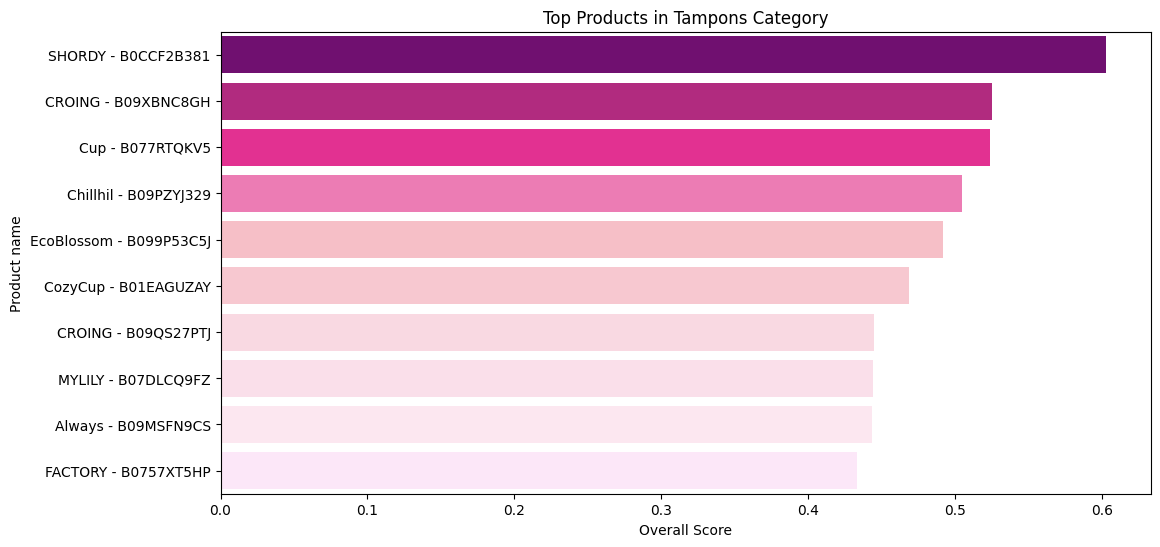

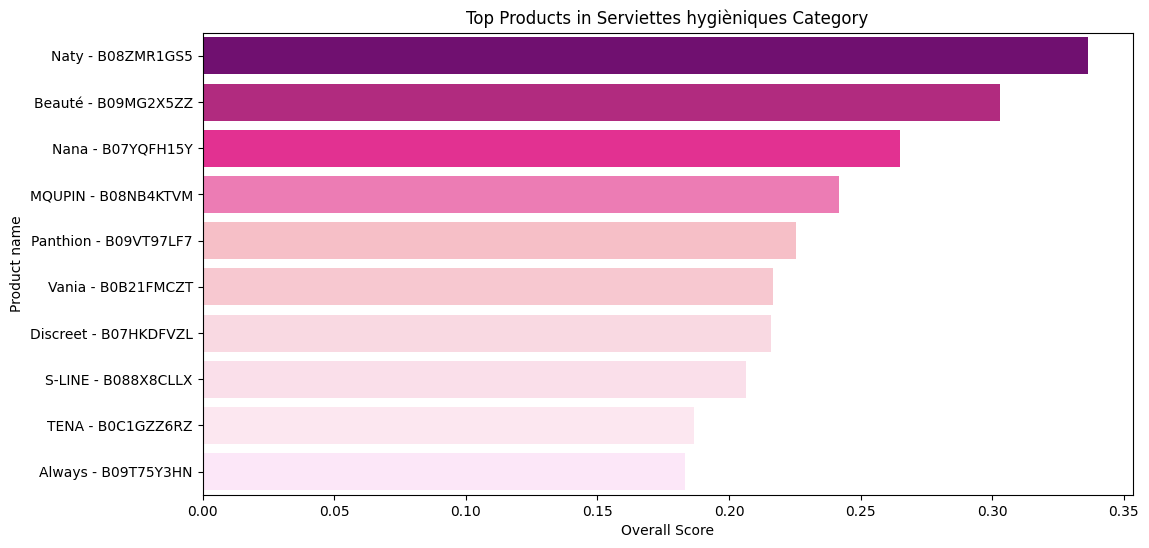

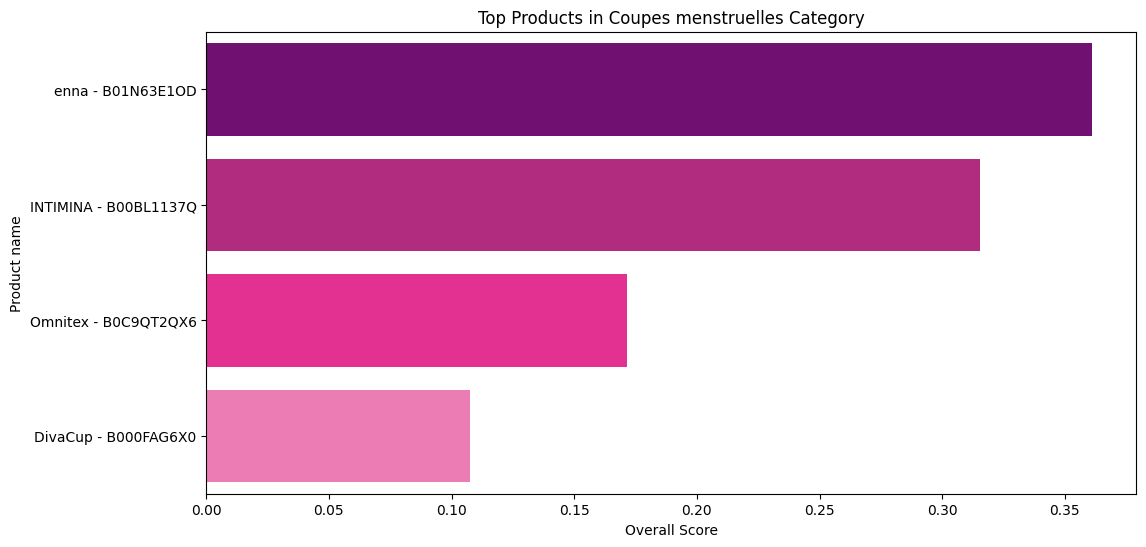

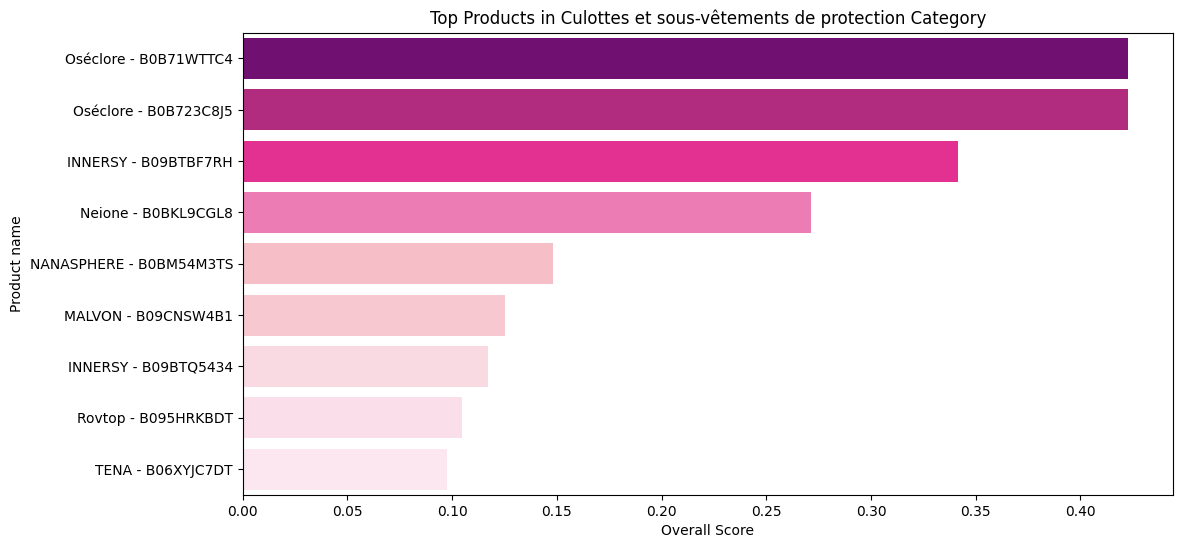

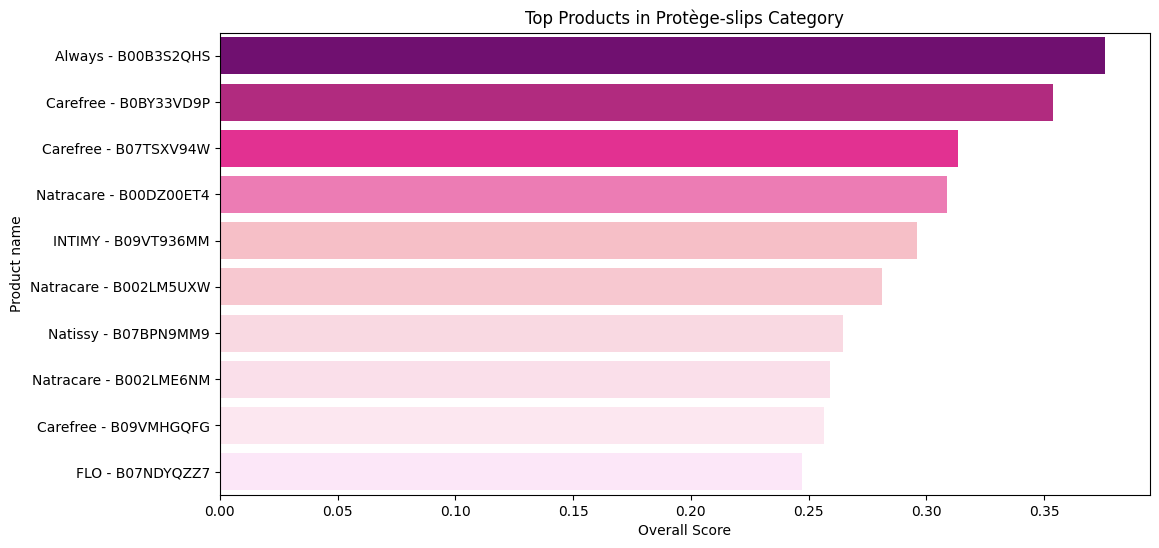

In [ ]:
# Creating one bar chart per category for the top 10 products in each category

# Iterating over each category to create a bar chart
for category in top_10_per_category["category"].unique():
    # Filtering data for the current category
    category_data = top_10_per_category[top_10_per_category["category"] == category]

    # Creating a bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x="average", y="product_name", data=category_data, palette=custom_palette
    )
    plt.title(f"Top Products in {category} Category")
    plt.xlabel("Overall Score")
    plt.ylabel("Product name")
    plt.show()


These five graphs provide a more precise overview, classifying the top 10 products per categories, which are: tampons, serviettes, cups, menstrual underwear, and pantyliners. This helps to give a scale of which products have the highest amount of positive and the lowest.

The first notable fact is that cups and menstrual underwear don't have as many products; this is because there is a lesser variety of products in this type of menstrual product. Comparatively, there is far more variety in the types of products for menstrual underwear than cups. However, we can see that for menstrual underwear, four products have far more positive reviews than the others.

When looking deeper at the brands associated with the products, we can classify which brand has had the most popularity in terms of attracting customers to comment about their products.

For example, "croing" seems to be the brand that comes back twice in the tampon graphic, showing us that several products in the same category are having consumers come back to them.

Another interesting view is in the "serviettes hygiéniques" and tampons category; there are not two different brands that return, showing the diversity prevalent in these categories of menstrual products.

In terms of menstrual underwear, there are several brands that return twice; these are "osecole" and "innversy." This can be interpreted in two ways. Firstly, that there is little brand variety for menstrual underwear, which explains why one brand could easily come back several times in the most used products. Or it could be interpreted that a consumer using a menstrual product they are happy with tends to return and purchase from the same brand, a potential variety as they are investing in a product that will last much longer than the single-use products.

This is a similar trend that we can observe in the "protege slip" category because there are brands that return three times in the top category: "natracare" and "carefree." It is interesting in this case to also note the fact that the brands have a word in common, which is "care," as this could entail that looking for one product through this keyword could lead you to looking at another product.


#**4/Looking into the data regarding reviews left by consumers**


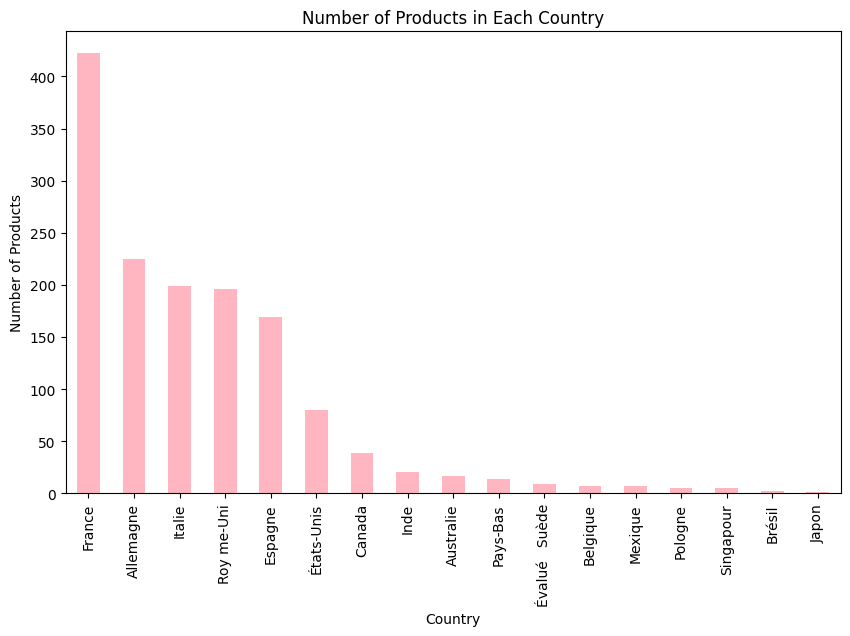

In [ ]:
# To get the number of products scrapped by country
product_count_by_country = df_reviews.groupby("country")["asin"].nunique()
# To order them in a descending order
product_count_by_country = product_count_by_country.sort_values(ascending=False)
# To plot the graph
product_count_by_country.plot(kind="bar", figsize=(10, 6), color="lightpink")
plt.title("Number of Products in Each Country")
plt.xlabel("Country")
plt.ylabel("Number of Products")
plt.show()


This graph offers additional insights into our scraped data. Originating from
Amazon.fr, it's crucial to recognize that the predominance of products sourced from France can be viewed as an outlier, potentially influencing the overall interpretation. However, a closer examination of the countries represented reveals a significant presence in Europe, accounting for almost half of all the countries evaluated (8 out of 18). An intriguing observation is the substantial representation of menstrual products in various countries across the American continent, including the USA, Canada, Mexico, and Brazil.

It's imperative to highlight the potential misinterpretation of this data. While the sourcing from Amazon.fr introduces a bias towards France, the broader inclusion of countries may be a consequence of the scraping process. Notably, the prevalence of English or French-speaking countries among the listed nations could be a direct result of the language-specific focus during scraping, emphasizing the need for cautious interpretation due to potential biases and limitations in the dataset.


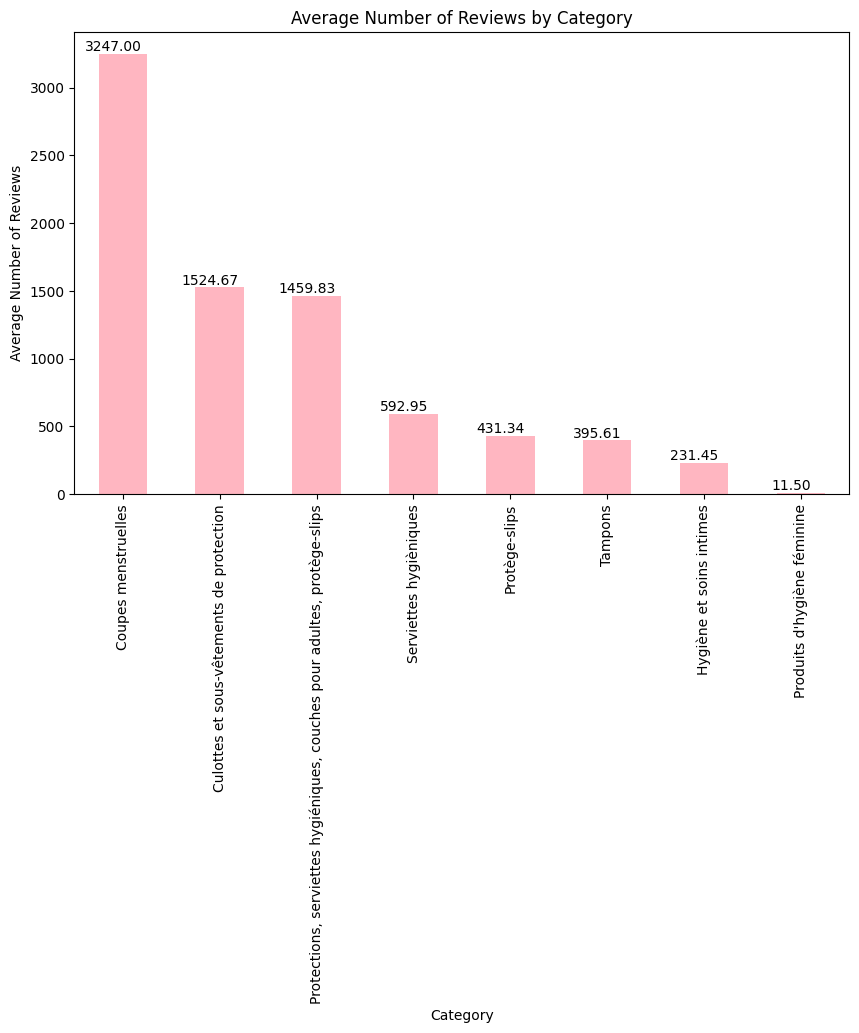

In [ ]:
desired_categories = [
    "Coupes menstruelles",
    "Culottes et sous-vêtements de protection",
    "Protections, serviettes hygiéniques, couches pour adultes, protège-slips",
    "Serviettes hygièniques",
    "Protège-slips",
    "Tampons",
    "Hygiène et soins intimes",
    "Produits d'hygiène féminine",
]

# Filter the DataFrame to include only the desired categories
filtered_df = df_products[df_products["category"].isin(desired_categories)]

# Calculate the average number of reviews by category
average_reviews_by_category = filtered_df.groupby("category")["num_reviews"].mean()

# Sort the data by the average number of reviews in descending order
average_reviews_by_category = average_reviews_by_category.sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = average_reviews_by_category.plot(kind="bar", color="lightpink")

# Add data labels to the bars
for bar in bars.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2 - 0.1,
        bar.get_height() + 0.1,
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
    )

plt.title("Average Number of Reviews by Category")
plt.xlabel("Category")
plt.ylabel("Average Number of Reviews")
plt.show()


This graph considers the information we obtained before. We could imagine that the amount of reviews would mainly reflect single-use protection like tampons, pads, or other similar products that seemed to have more variety, leading to more reviews.

However, in this specific data, we see that there are far more reviews for cups and menstrual underwear. This is important because it means that the people who are using these products are feeling strongly about them, whether it be in a positive or negative light.

Another notable point is that the product with the least amount of reviews revolves around the subject of hygiene and feminine care products. This could be for two reasons: either a lack of information on the need for hygiene, which is why there are few reviews, or, on the contrary, that there is no need to post reviews as women already know which of these products work best for them.


In [ ]:
df_reviews


,Unnamed: 0,asin,rating,title,country,date,body,body_en
0,0,B07BFMNKBJ,1,Pas reçue,France,2020-12-02,Ont me dis que je les reçue alors que non !,I was told that I received them when I didn&#3...
1,1,B07BFMNKBJ,1,Sans commentaire,France,2018-10-11,Sans commentaire,No comment
2,2,B07BFMNKBJ,5,Parfait 👌,France,2022-01-27,"J'utilise ce modèle depuis des années, je ne c...","I have been using this model for years, I no l..."
3,3,B07BFMNKBJ,4,Bien mais,France,2021-11-21,Légèrement moins cher qu’en grande surface mai...,Slightly cheaper than supermarkets but Pro Con...
4,4,B07BFMNKBJ,4,Bons tampons,France,2022-01-29,Rien de particulier à signaler.,Nothing special to report.
...,...,...,...,...,...,...,...,...
12629,12629,B085WDK4Y4,5,Im Sparabo noch günstiger,Allemagne,2020-08-02,Hier kann man nur sagen.Markenprodukte halten ...,All you can say here is that branded products ...
12630,12630,B085WDK4Y4,2,Für mich leider ungeeignet.,Allemagne,2021-06-10,Der Frischefuft macht mir als Asthmatiker zu s...,"As an asthmatic, the fresh scent bothers me."
12631,12631,B085WDK4Y4,5,always -slipeinlagen,Allemagne,2020-11-19,Sehr gutes Produkt.,Very good product.
12632,12632,B085WDK4Y4,5,Yes,Allemagne,2020-10-29,Perfect,Perfect


In [ ]:
merged_df = pd.merge(
    df_reviews, df_products[["asin", "category"]], on="asin", how="left"
)

# Save the merged DataFrame to a new CSV file or update the 'reviews_en.csv' file
merged_df.to_csv("merged_reviews.csv", index=False)

df_merge = pd.read_csv("merged_reviews.csv")


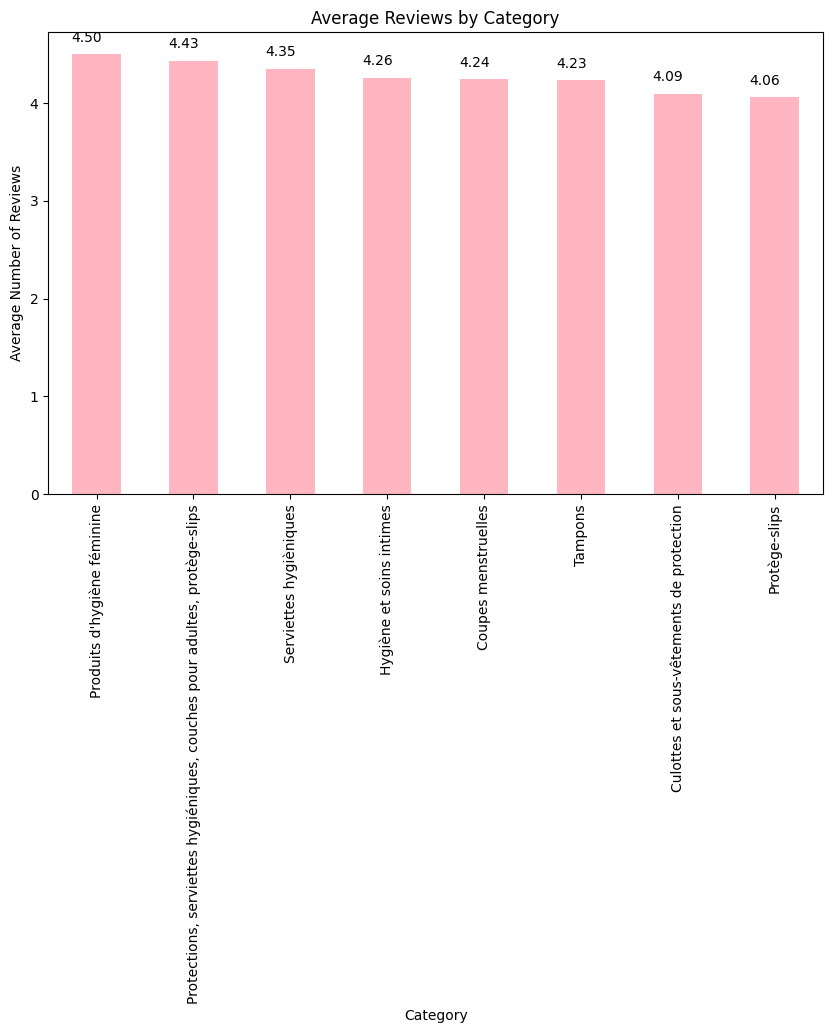

In [ ]:
# Filter the merged DataFrame to include only the desired categories
filtered_df = df_merge[merged_df["category"].isin(desired_categories)]

# Calculate the average number of reviews by category
average_reviews_by_category = filtered_df.groupby("category")["rating"].mean()

# Sort the data by the average number of reviews in descending order
average_reviews_by_category = average_reviews_by_category.sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = average_reviews_by_category.plot(kind="bar", color="lightpink")

# Add data labels to the bars
for bar in bars.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2 - 0.1,
        bar.get_height() + 0.1,
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
    )

plt.title("Average Reviews by Category")
plt.xlabel("Category")
plt.ylabel("Average Number of Reviews")
plt.show()


This graph looks at the review rating left by the reviewer on a scale from 0-5, with 0 being the lowest and 5 being the highest.

The reason we didn't base our scoring solely on these ratings is because we can't check the bias of the people who are writing these reviews. Amazon is known for paying people to review their products, which introduces inherent bias. Additionally, the people known for reviewing tend to be either very happy or very unhappy with the products.

However, these are just factors to keep in mind when looking at the actual data.

When examining the average review rating per category, the most popular category appears to be female hygiene products. This is important to match with the previous graph. For example, a high rating with few reviews lets us know that the average rating could be misleading.

Moreover, all categories of products have ratings between 4-4.5, which is relatively high, leading us to conclude that there are very few negative review ratings. Additionally, the review ratings are arbitrary as they are just numbers; therefore, we need to look deeper at the content of the reviews.


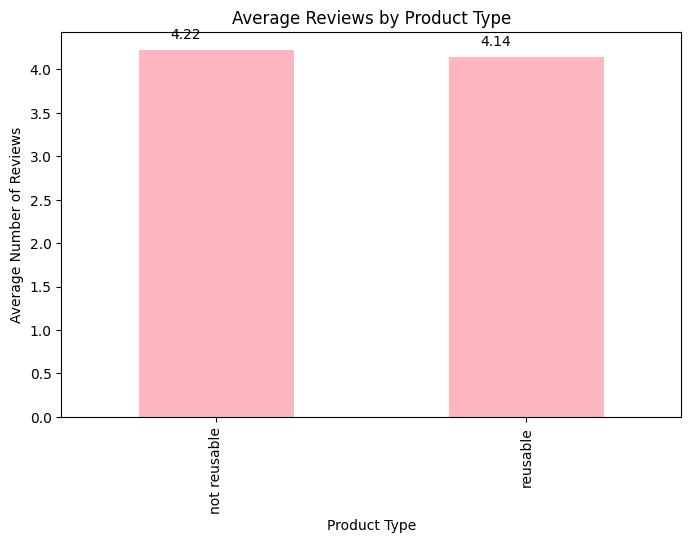

In [ ]:
# Define a dictionary to map categories to product types
category_to_product_type = {
    "Serviettes hygièniques": "not reusable",
    "Tampons": "not reusable",
    "Protège-slips": "not reusable",
    "Culottes et sous-vêtements de protection": "reusable",
    "Protections, serviettes hygiéniques, couches pour adultes, protège-slips": "not reusable",
    "Coupes menstruelles": "reusable",
    "Hygiène et soins intimes": "not reusable",
    "Vêtements de contention médicaux": "not reusable",
    "Serviettes": "not reusable",
    "Produits d'hygiène féminine": "not reusable",
}

# Add a new column 'product_type' based on the mapping
merged_df["product_type"] = merged_df["category"].map(category_to_product_type)

# Filter the merged DataFrame to include only the desired categories
filtered_df = merged_df[merged_df["category"].isin(category_to_product_type.keys())]

# Calculate the average number of reviews by product type
average_reviews_by_product_type = filtered_df.groupby("product_type")["rating"].mean()

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bars = average_reviews_by_product_type.plot(kind="bar", color="lightpink")

# Add data labels to the bars
for bar in bars.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2 - 0.1,
        bar.get_height() + 0.1,
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
    )

plt.title("Average Reviews by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Average Number of Reviews")
plt.show()


Another key piece of information is the difference in ratings between reusable menstrual products (cups, underwear) and non-reusable products (tampons, pads, panty liners).

Overall, there is a higher rating for non-reusable products than reusable products; however, there is only a small difference in the overall average rating.


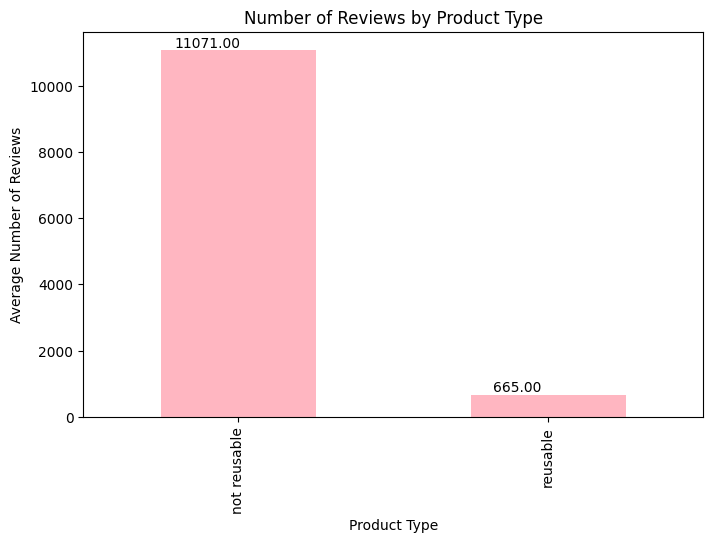

In [ ]:
# Define a dictionary to map categories to product types
category_to_product_type = {
    "Serviettes hygièniques": "not reusable",
    "Tampons": "not reusable",
    "Protège-slips": "not reusable",
    "Culottes et sous-vêtements de protection": "reusable",
    "Protections, serviettes hygiéniques, couches pour adultes, protège-slips": "not reusable",
    "Coupes menstruelles": "reusable",
    "Hygiène et soins intimes": "not reusable",
    "Vêtements de contention médicaux": "not reusable",
    "Serviettes": "not reusable",
    "Produits d'hygiène féminine": "not reusable",
}

# Add a new column 'product_type' based on the mapping
merged_df["product_type"] = merged_df["category"].map(category_to_product_type)

# Filter the merged DataFrame to include only the desired categories
filtered_df = merged_df[merged_df["category"].isin(category_to_product_type.keys())]

# Calculate the number of reviews by product type
average_reviews_by_product_type = filtered_df.groupby("product_type")["asin"].count()

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bars = average_reviews_by_product_type.plot(kind="bar", color="lightpink")

# Add data labels to the bars
for bar in bars.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2 - 0.1,
        bar.get_height() + 0.1,
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
    )

plt.title("Number of Reviews by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Average Number of Reviews")
plt.show()


This graph addresses a key issue, which is the amount of reviews that exist for reusable and non-reusable products.

Clearly, there are much more reviews for non-reusable products. This could be for various reasons. A first hypothesis is that the presence of reusable products is far more recent, and therefore there is less time and less development in the number of products in the market to review.


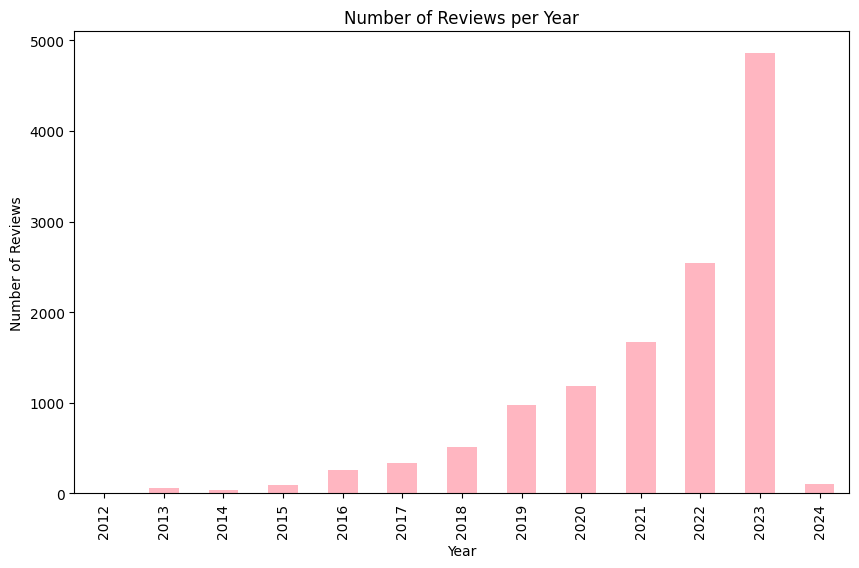

In [ ]:
# Convert 'date' column to datetime format
merged_df["date"] = pd.to_datetime(merged_df["date"], format="%Y-%m-%d")

# Extract the year from the 'date' column
merged_df["review_year"] = merged_df["date"].dt.year

# Calculate the number of reviews per year
reviews_per_year = merged_df.groupby("review_year")["rating"].count()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
reviews_per_year.plot(kind="bar", color="lightpink")
plt.title("Number of Reviews per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


This graph shows us where the reviews are coming from. This is important to understand the consumer demographic since this information is sourced from Amazon France. A key piece of information to note is that in order to scrap this data, you can only scrap a maximimum of 100 reviews per page that are considered the most relevant which limits us in the possibility of creating a historical overview.

Similarly, to the graph looking at the amount of products per country, we see that a majority of the reviews are coming from European countries. Other countries where the reviews are coming from also use English to publish reviews.


This graph helps illustrate how the number of reviews can/has increased over time.

Starting in 2012 with no reviews, there are several explanations, such as the fact that none of these products were available on Amazon.

Comparatively, it seems as though the number of reviews is increasing significantly over time. There is a peak increase in 2023; this could be because there are now more products to review as the variety of reusable menstrual products is increasing.

Similarly, the dip in the number of reviews in 2024 is due to the fact that only two weeks of 2024 have passed.


#**Next Steps**

The analysis of our scraped data, coupled with an understanding of the contextual needs and issues related to misinformation and misuse of menstrual products, led us to develop a business solution, otherwise known as Elissa.
